# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install holidays
import holidays
from holidays import country_holidays
import os
import glob

# Prepare data for questions

In [2]:
#glob all data together
f = "Data/Chicago-Crime*.csv"
crime_data = sorted(glob.glob(f))
crime_data

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [3]:
#create main df
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in crime_data])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [4]:
#change datatype of date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].isna().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              float64       
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 662.0+ MB


In [6]:
#make datetime the index
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [7]:
#make a copy
df_counts = df.copy()
df_counts

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [8]:
#resample the copy so that each row is one day
df_counts = df_counts.resample("D").sum()
df_counts

C:\Users\17175\AppData\Local\Temp\ipykernel_17400\2444150656.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_counts = df_counts.resample("D").sum()


,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,
2001-01-01,4011740634,400,378,2267987,21147.0,8194.0,72641.077994,-152199.715024
2001-01-02,1545846568,383,187,1404493,12797.0,147.0,47664.670569,-99856.853277
2001-01-03,1542074517,343,197,1462886,13359.0,132.0,48045.805839,-100651.350927
2001-01-04,1555657957,377,179,1397040,12994.0,0.0,48785.523718,-102222.916683
2001-01-05,1701884634,415,200,1530155,14044.0,156.0,52769.463977,-110554.590960
...,...,...,...,...,...,...,...,...
2022-12-27,7543189950,70,96,694723,6812.0,14192.0,21427.078656,-44887.568351
2022-12-28,7983384637,63,112,697152,6830.0,14030.0,22592.581721,-47339.899182
2022-12-29,8358666625,66,107,718511,7037.0,14292.0,23639.979313,-49528.016672


# Stakeholder Questions:

## Topic 1) Compare Months

### What months had the most crimes? which had the least?

In [9]:
#extract the months
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head()

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Month,MonthName
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1,January
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,1,January
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970,1,January
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032,1,January
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020,1,January


In [10]:
#saveing lookup for number vs name of month
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup = dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

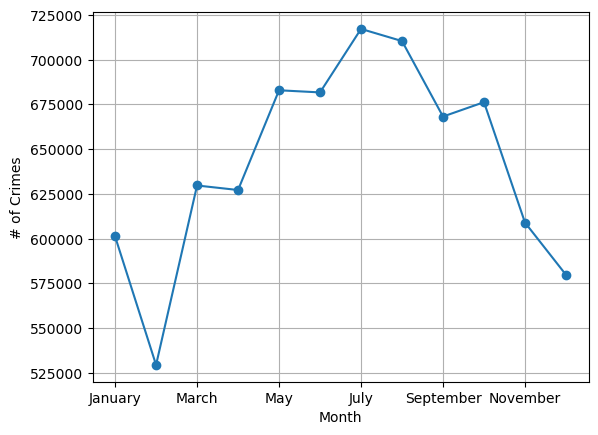

In [11]:
#save month counts 
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
#make plot
ax = month_counts.plot(style='o-', grid=True, ylabel='# of Crimes', xlabel='Month');

#### It looks like the winter months, November-February had the least amount of crimes and the summer months, May-August had the most amount of crimes

### Are there any individual crimes that do not follow this pattern? if so, which crimes?

In [42]:
#save value count of individual counts by month
crimes_by_month = df.groupby("Month")['Primary Type'].value_counts(normalize=False)
crimes_by_month

Month  Primary Type                    
1      THEFT                               123454
       BATTERY                             101302
       NARCOTICS                            65943
       CRIMINAL DAMAGE                      62574
       OTHER OFFENSE                        42162
                                            ...  
12     OTHER NARCOTIC VIOLATION                 8
       HUMAN TRAFFICKING                        4
       RITUALISM                                3
       NON - CRIMINAL                           1
       NON-CRIMINAL (SUBJECT SPECIFIED)         1
Name: Primary Type, Length: 415, dtype: int64

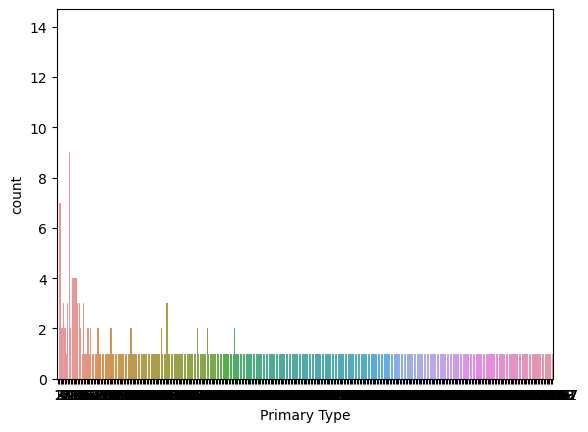

In [45]:
sns.countplot(data=df,x=crimes_by_month);

## Topic 2) Comparing AM vs PM Rush Hour

### Are crimes more common during AM rush hour (7-10am) or PM rush hour (4-7pm)?

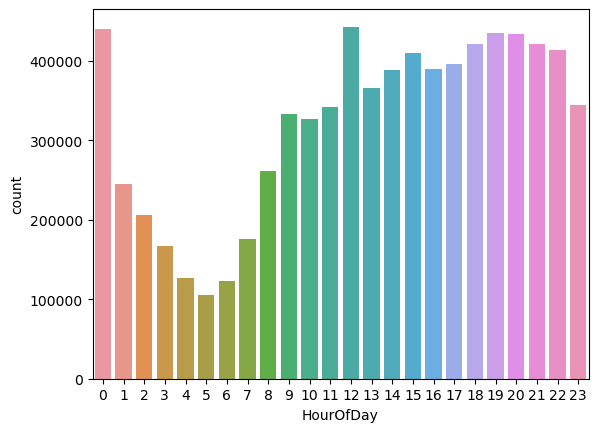

In [23]:
#create an hour of day column
df['HourOfDay'] = df.index.hour
sns.countplot(data=df, x='HourOfDay');

#### It looks like the PM Rush Hour is more common to commit a crime

### What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

In [24]:
#save crimes by hour
crimes_by_hour = df.groupby("HourOfDay")['Primary Type'].value_counts(normalize=False)
crimes_by_hour

HourOfDay  Primary Type                    
0          THEFT                               91882
           BATTERY                             71777
           CRIMINAL DAMAGE                     64386
           DECEPTIVE PRACTICE                  40410
           OTHER OFFENSE                       27799
                                               ...  
23         PUBLIC INDECENCY                        6
           NON-CRIMINAL                            4
           RITUALISM                               3
           HUMAN TRAFFICKING                       1
           NON-CRIMINAL (SUBJECT SPECIFIED)        1
Name: Primary Type, Length: 800, dtype: int64

In [28]:
#save am rush hour
am_rush_hour = crimes_by_hour.loc[7]+crimes_by_hour.loc[8]+crimes_by_hour.loc[9]+crimes_by_hour.loc[10]
am_rush_hour

Primary Type
ARSON                                  1139
ASSAULT                               73636
BATTERY                              158475
BURGLARY                              96219
CONCEALED CARRY LICENSE VIOLATION       157
CRIM SEXUAL ASSAULT                    2567
CRIMINAL DAMAGE                      109089
CRIMINAL SEXUAL ASSAULT                 544
CRIMINAL TRESPASS                     30493
DECEPTIVE PRACTICE                    80006
GAMBLING                                652
HOMICIDE                               1133
HUMAN TRAFFICKING                        19
INTERFERENCE WITH PUBLIC OFFICER       1380
INTIMIDATION                            907
KIDNAPPING                             1649
LIQUOR LAW VIOLATION                    409
MOTOR VEHICLE THEFT                   54035
NARCOTICS                             67032
NON - CRIMINAL                           19
NON-CRIMINAL                             40
OBSCENITY                               145
OFFENSE INVOLVING C

In [29]:
#save pm rush hour
pm_rush_hour = crimes_by_hour.loc[16]+crimes_by_hour.loc[17]+crimes_by_hour.loc[18]+crimes_by_hour.loc[19]
pm_rush_hour

Primary Type
ARSON                                  1523.0
ASSAULT                              118179.0
BATTERY                              288003.0
BURGLARY                              78604.0
CONCEALED CARRY LICENSE VIOLATION       187.0
CRIM SEXUAL ASSAULT                    3874.0
CRIMINAL DAMAGE                      183423.0
CRIMINAL SEXUAL ASSAULT                 824.0
CRIMINAL TRESPASS                     48564.0
DECEPTIVE PRACTICE                    58973.0
GAMBLING                               4905.0
HOMICIDE                               2227.0
HUMAN TRAFFICKING                        12.0
INTERFERENCE WITH PUBLIC OFFICER       4403.0
INTIMIDATION                           1008.0
KIDNAPPING                             2092.0
LIQUOR LAW VIOLATION                   4168.0
MOTOR VEHICLE THEFT                   74678.0
NARCOTICS                            164754.0
NON - CRIMINAL                            5.0
NON-CRIMINAL                             40.0
NON-CRIMINAL (SUBJECT

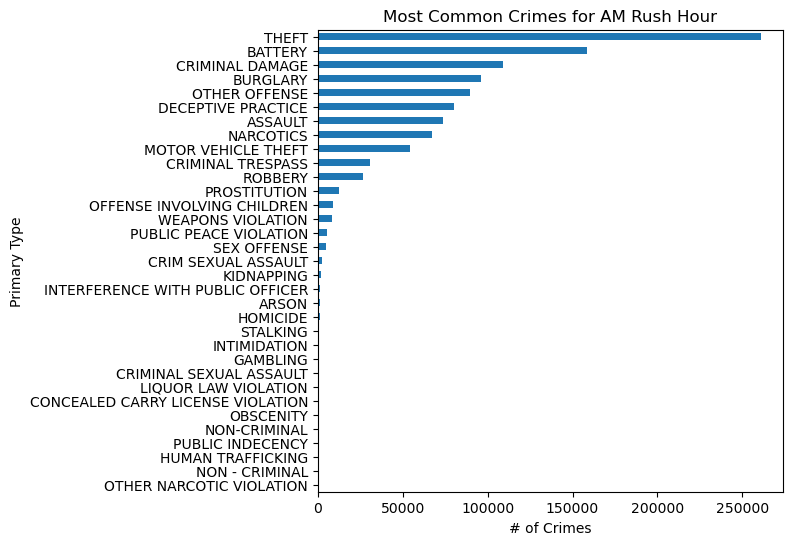

In [30]:
#plot am rush hour
ax = am_rush_hour.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for AM Rush Hour',xlabel='# of Crimes');

#### We can see that Theft, Battery, Criminal Damage, Burglary, and Other Offense are the top five common crimes committed during AM Rush Hour.

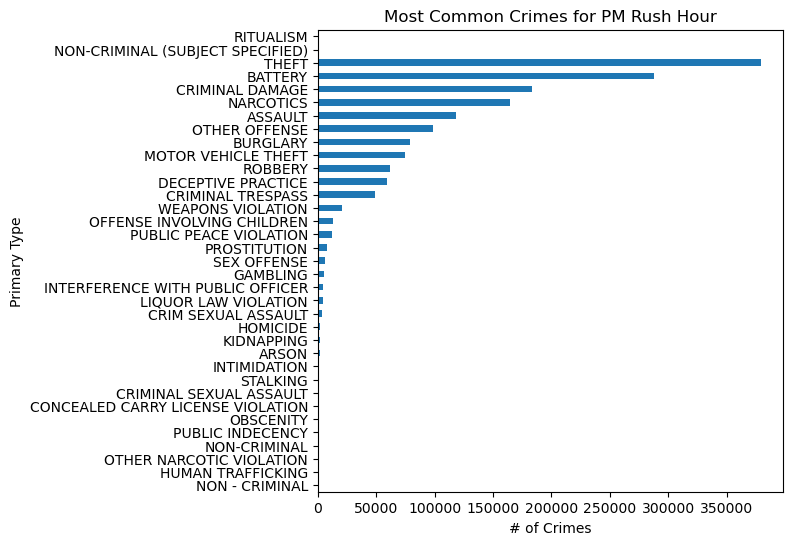

In [31]:
#plot pm rush hour
ax = pm_rush_hour.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for PM Rush Hour',xlabel='# of Crimes');

#### We can see that Theft, Battery, Criminal Damage, Narcotics, and Assault are the top five crimes committed during PM Rush Hour

### Are motor vehicle thefts more common during AM rush hour or PM rush hour

In [33]:
am_rush_hour.loc['MOTOR VEHICLE THEFT']

54035

In [34]:
pm_rush_hour.loc['MOTOR VEHICLE THEFT']

74678.0

#### It looks like motor vehicle theft is slightly more common during the PM Rush Hour

## Topic 3) Comparing Holidays

In [55]:
## making a date range that covers full dataset
all_days = pd.date_range(df_counts.index.min(), df_counts.index.max())
all_days

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=8035, freq='D')

In [56]:
## Create an instance of the US country holidays.
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [57]:
## Getting us holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

In [58]:
## Saving holiday types as a column
df_counts["US Holiday"] = [us_holidays.get(day) for day in df_counts.index]
df_counts.head()

,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,US Holiday
Date,,,,,,,,,
2001-01-01,4011740634,400,378,2267987,21147.0,8194.0,72641.077994,-152199.715024,New Year's Day
2001-01-02,1545846568,383,187,1404493,12797.0,147.0,47664.670569,-99856.853277,None
2001-01-03,1542074517,343,197,1462886,13359.0,132.0,48045.805839,-100651.350927,None
2001-01-04,1555657957,377,179,1397040,12994.0,0.0,48785.523718,-102222.916683,None
2001-01-05,1701884634,415,200,1530155,14044.0,156.0,52769.463977,-110554.590960,None


### What are the top 3 holidays with the largest number of crimes?

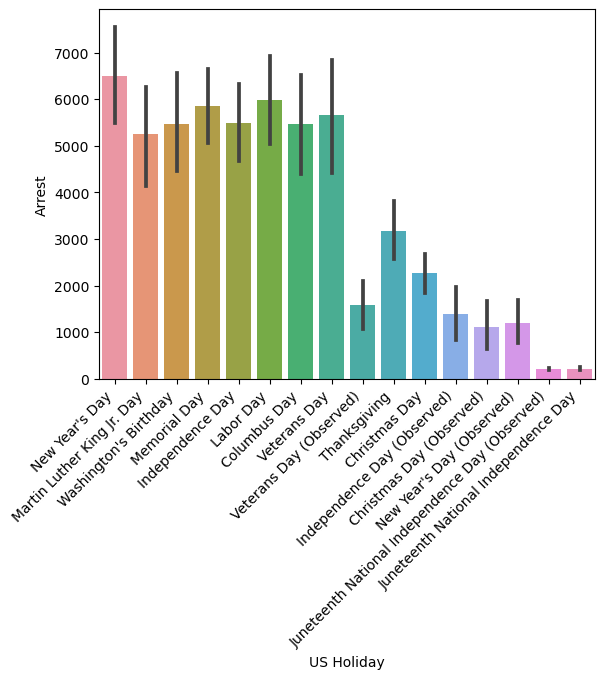

In [59]:
#plot holiday crime counts
ax = sns.barplot(data=df_counts, x='US Holiday',y='Arrest',estimator=np.sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right');

#### It looks like New Years, Labor Day, and Memorial day have the highest crime rates

### For each of the top 3 holidays with the most crime, what are the top 5 most common crimes on that holiday?

In [60]:
#group the holidays and crimes together
holiday_crimes = df.groupby('US Holiday')['Primary Type'].value_counts()
holiday_crimes = holiday_crimes.to_frame('# of Crimes')
holiday_crimes

# of Crimes
US Holiday            Primary Type                                  
Christmas Day         BATTERY                                   3431
                      THEFT                                     1869
                      CRIMINAL DAMAGE                           1743
                      ASSAULT                                    883
                      OTHER OFFENSE                              854
...                                                              ...
Washington's Birthday GAMBLING                                    12
                      KIDNAPPING                                  11
                      INTIMIDATION                                10
                      STALKING                                     9
                      CONCEALED CARRY LICENSE VIOLATION            4

[443 rows x 1 columns]

In [62]:
#Get New Years
new_years = pd.concat([holiday_crimes.loc["New Year's Day"],
                  holiday_crimes.loc["New Year's Day (Observed)"]],
                 axis=1)
new_years

,# of Crimes,# of Crimes
Primary Type,,
THEFT,6845,929.0
BATTERY,6043,843.0
CRIMINAL DAMAGE,3236,687.0
DECEPTIVE PRACTICE,2934,220.0
OFFENSE INVOLVING CHILDREN,2380,30.0
OTHER OFFENSE,2380,318.0
NARCOTICS,1498,419.0
ASSAULT,1216,289.0
MOTOR VEHICLE THEFT,994,255.0


In [63]:
## get the .sum ACROSS columns (use axis=1)
new_years_sum = new_years.sum(axis=1)
new_years_sum

Primary Type
THEFT                                7774.0
BATTERY                              6886.0
CRIMINAL DAMAGE                      3923.0
DECEPTIVE PRACTICE                   3154.0
OFFENSE INVOLVING CHILDREN           2410.0
OTHER OFFENSE                        2698.0
NARCOTICS                            1917.0
ASSAULT                              1505.0
MOTOR VEHICLE THEFT                  1249.0
SEX OFFENSE                           918.0
BURGLARY                             1135.0
WEAPONS VIOLATION                     933.0
ROBBERY                              1010.0
CRIM SEXUAL ASSAULT                   777.0
CRIMINAL TRESPASS                     584.0
CRIMINAL SEXUAL ASSAULT               207.0
PUBLIC PEACE VIOLATION                134.0
PROSTITUTION                           76.0
INTERFERENCE WITH PUBLIC OFFICER       68.0
LIQUOR LAW VIOLATION                   64.0
HOMICIDE                               38.0
ARSON                                  38.0
KIDNAPPING         

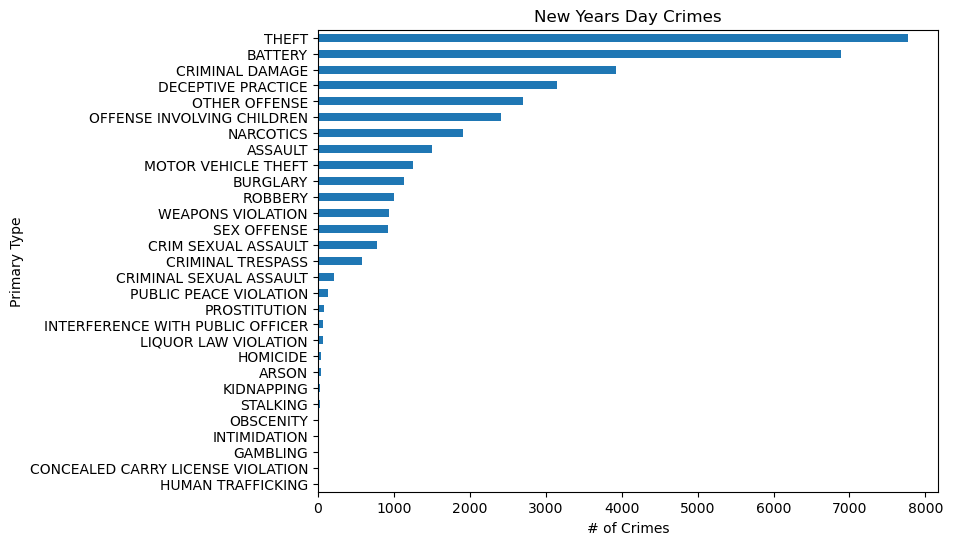

In [64]:
ax = new_years_sum.sort_values().plot(kind='barh',figsize=(8,6))
ax.set(title="New Years Day Crimes", xlabel='# of Crimes');

#### The most common crimes on New Years is Theft, Battery, Criminal Damage, Deceptive Practice, and Other Offense.

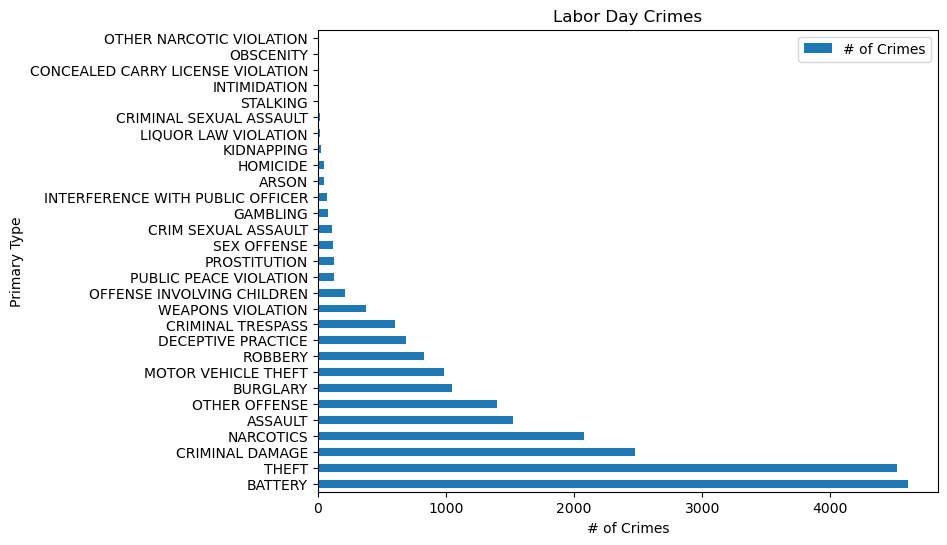

In [68]:
#plot Laborday
labor_day = holiday_crimes.loc["Labor Day"]
ax = labor_day.plot(kind='barh',figsize=(8,6))
ax.set(title="Labor Day Crimes", xlabel='# of Crimes');

#### The top five crimes committed on labor day are Battery, Theft, Criminal Damage, Narcotics, and Assault

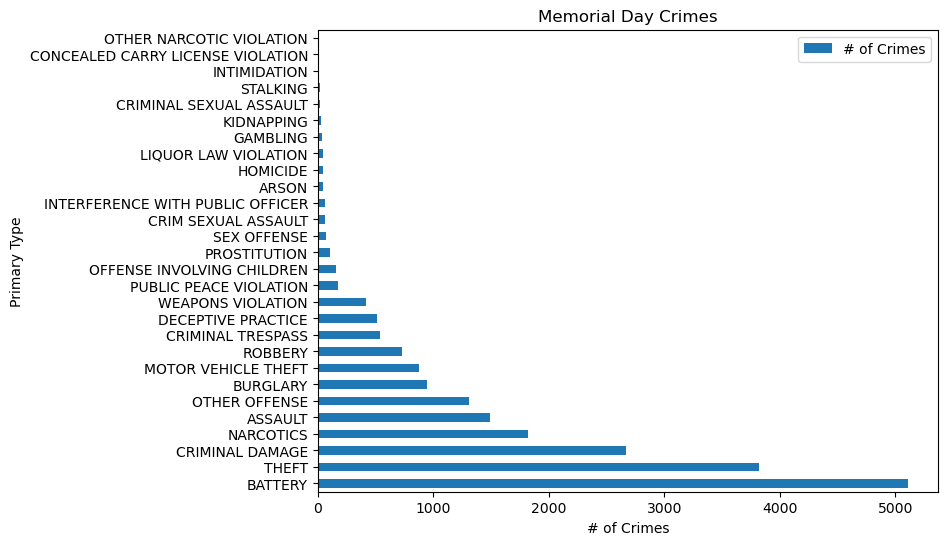

In [69]:
#plot Memorial day
memorial_day = holiday_crimes.loc["Memorial Day"]
ax = memorial_day.plot(kind='barh',figsize=(8,6))
ax.set(title="Memorial Day Crimes", xlabel='# of Crimes');

#### the top five crimes for memorial day are Battery, Theft, Criminal Damage, Narcotics, and Assault